In [11]:
import pandas as pd
import numpy as np
from functools import reduce
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns 
from matplotlib.lines import Line2D
from wordcloud import WordCloud, STOPWORDS

In [31]:
def make_a_df(properties) :
    df_stock = pd.DataFrame()
    times=[]
    names=[]
    for i in range(len(properties)):
            m=properties[i].split('\t')
            times.append(int(m[1]))
            names.append(m[0])
            
    df_stock['name'] = names
    df_stock['times_mentioned'] = times
    
    return df_stock

In [32]:
file = open("output_mentioncounts.txt","r")
file2 = open("stockmentions.txt",'r')
text = file.read()
properties = text.split('\n')

In [33]:
top10_mentioned = make_a_df(properties).sort_values(by = ['times_mentioned'],axis = 0,ascending = False).head(10)

In [34]:
top10_mentioned

,name,times_mentioned
87,SDC,12
84,ROOT,10
73,OCGN,9
97,SOFI,9
109,WISH,7
78,PROG,6
107,VIH,6
33,DATS,5
47,GME,4
89,SENS,4


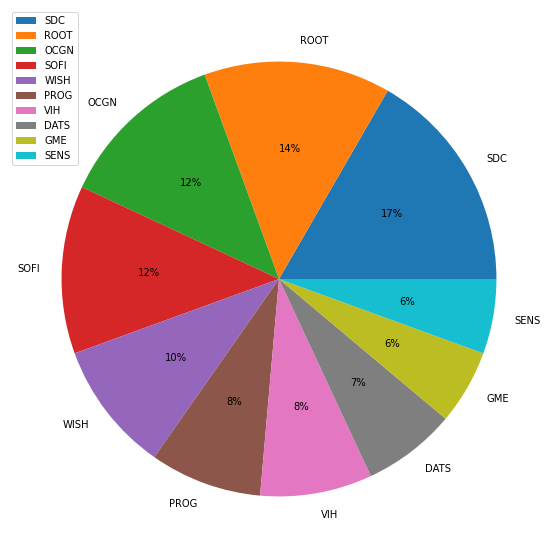

In [35]:
plt.figure(figsize=(10,10))
plt.pie(x=top10_mentioned.times_mentioned, labels=top10_mentioned.name, autopct="%0.0f%%")
plt.legend()

Text(0.5, 1.0, 'Adjust Styles of Bar plot')

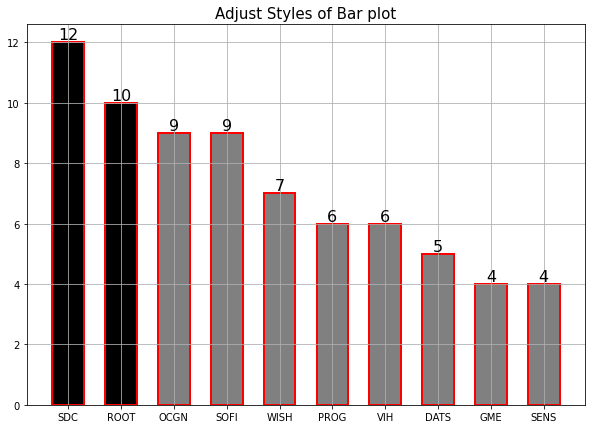

In [36]:
fig, ax = plt.subplots(figsize=(10, 7))
x=top10_mentioned.name
y=top10_mentioned.times_mentioned
ax.grid()
ax.bar(
    x=x, 
    height=y, 
    width=0.6, 
    align="center",  
    color=['black','black','grey','grey','grey','grey','grey','grey','grey','grey'], 
    edgecolor="red", 
    linewidth=2.0 
)
for i,j in enumerate(y):
    plt.text(i,j+0.1,j,ha='center',fontsize=16)
ax.set_title("Adjust Styles of Bar plot", fontsize=15)

In [37]:
text2 = file2.read()

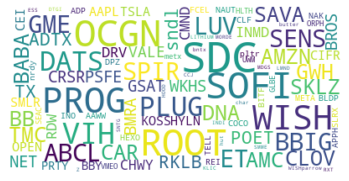

In [38]:
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text2)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()